In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
#load dataset
df = pd.read_csv("best_selling_books_2.csv")

df.head()


,Rank,Title,Author,Volume Sales,Publisher,Genre
0,1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children's Fiction
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children's Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children's Fiction
4,5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas


Data Overview

In [3]:
#data overview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          100 non-null    int64 
 1   Title         100 non-null    object
 2   Author        100 non-null    object
 3   Volume Sales  100 non-null    object
 4   Publisher     100 non-null    object
 5   Genre         100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [4]:
df.describe()


,Rank
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


Data Cleaning

In [5]:
#rename kolom
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()


,rank,title,author,volume_sales,publisher,genre
0,1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children's Fiction
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children's Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children's Fiction
4,5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas


In [6]:
#convert volume_sales to numeric
df["volume_sales"] = df["volume_sales"].str.replace(",", "").astype(float)
df.head()


,rank,title,author,volume_sales,publisher,genre
0,1,"Da Vinci Code,The","Brown, Dan",5094805.0,Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152.0,Bloomsbury,Children's Fiction
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654.0,Bloomsbury,Children's Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479.0,Bloomsbury,Children's Fiction
4,5,Fifty Shades of Grey,"James, E. L.",3758936.0,Random House,Romance & Sagas


In [7]:
#check missing values
df.isnull().sum()


,0
rank,0
title,0
author,0
volume_sales,0
publisher,0
genre,0


Visualisasi

In [8]:
#top 10 best-selling books
top_books = df.sort_values(by="volume_sales", ascending=False).head(10)

top_books[["title", "author", "volume_sales"]]


,title,author,volume_sales
0,"Da Vinci Code,The","Brown, Dan",5094805.0
1,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152.0
2,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654.0
3,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479.0
4,Fifty Shades of Grey,"James, E. L.",3758936.0
5,Harry Potter and the Goblet of Fire,"Rowling, J.K.",3583215.0
6,Harry Potter and the Chamber of Secrets,"Rowling, J.K.",3484047.0
7,Harry Potter and the Prisoner of Azkaban,"Rowling, J.K.",3377906.0
8,Angels and Demons,"Brown, Dan",3193946.0
9,Harry Potter and the Half-blood Prince:Childre...,"Rowling, J.K.",2950264.0


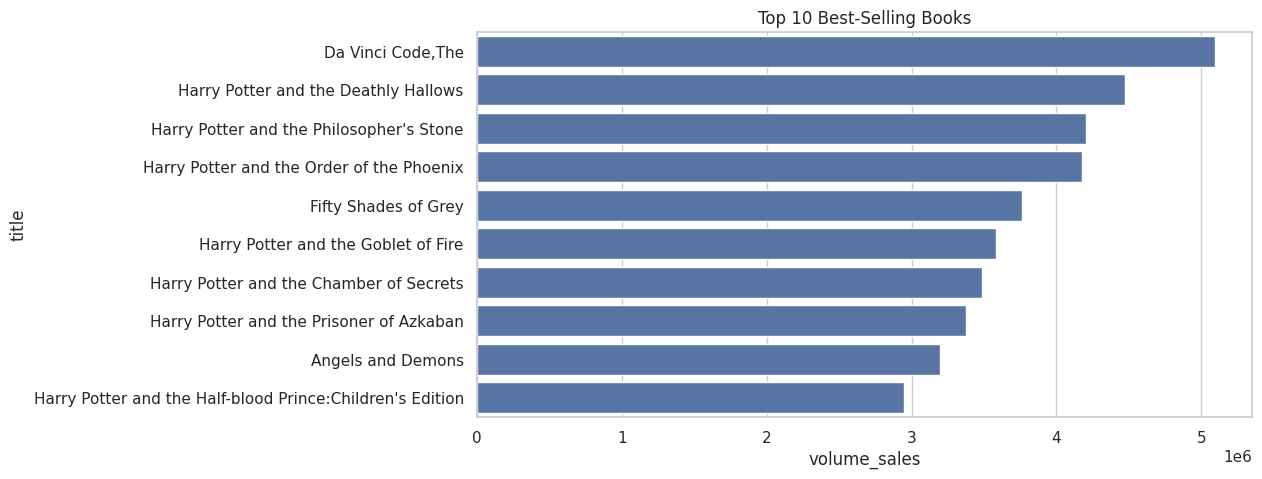

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_books, x="volume_sales", y="title")
plt.title("Top 10 Best-Selling Books")
plt.show()


In [10]:
#author performance analysis
author_sales = df.groupby("author")["volume_sales"].sum().sort_values(ascending=False).head(10)

author_sales


,volume_sales
author,
"Rowling, J.K.",28494745.0
"Brown, Dan",14462827.0
"James, E. L.",8432648.0
"Meyer, Stephenie",8308136.0
"Larsson, Stieg",5603489.0
"Oliver, Jamie",5160955.0
"Donaldson, Julia",3832515.0
"Bryson, Bill",3675078.0
"Pullman, Philip",3220977.0


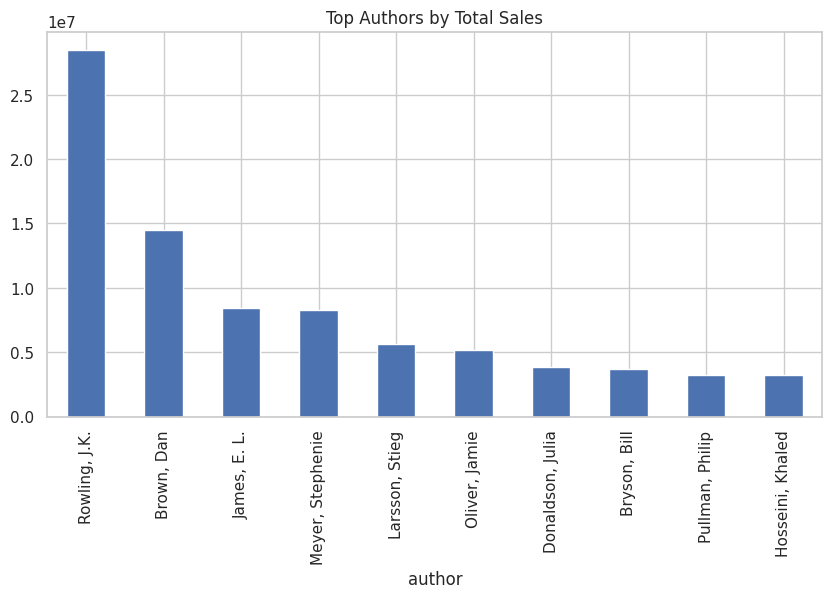

In [11]:
author_sales.plot(kind="bar", figsize=(10,5), title="Top Authors by Total Sales")
plt.show()


In [12]:
#genre performance analiysis
genre_sales = df.groupby("genre")["volume_sales"].sum().sort_values(ascending=False)

genre_sales


,volume_sales
genre,
General & Literary Fiction,38469803.0
Children's Fiction,27341564.0
"Crime, Thriller & Adventure",25071822.0
Young Adult Fiction,13325714.0
Romance & Sagas,8432648.0
Food & Drink: General,6132545.0
Picture Books,5616050.0
Autobiography: General,3731977.0
Autobiography: The Arts,3712452.0


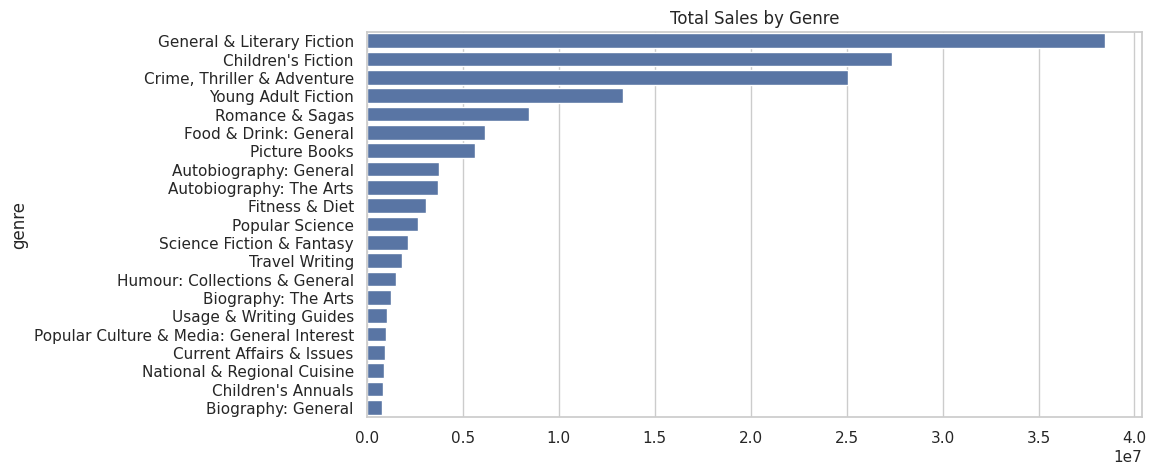

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title("Total Sales by Genre")
plt.show()


In [14]:
#publisher market share
publisher_sales = df.groupby("publisher")["volume_sales"].sum().sort_values(ascending=False).head(10)

publisher_sales


,volume_sales
publisher,
Bloomsbury,31707856.0
Random House,27124816.0
Transworld,23481592.0
Penguin,15109759.0
"Little, Brown Book",10383181.0
Pan Macmillan,9085383.0
HarperCollins,7590622.0
Quercus,5603489.0
Orion,5091561.0


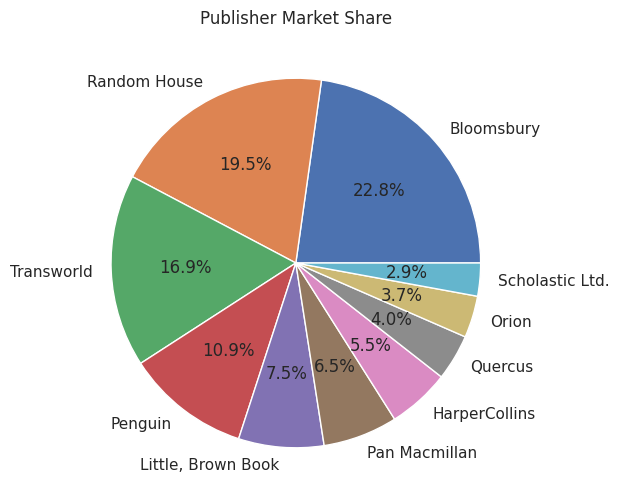

In [15]:
publisher_sales.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), title="Publisher Market Share")
plt.ylabel("")
plt.show()


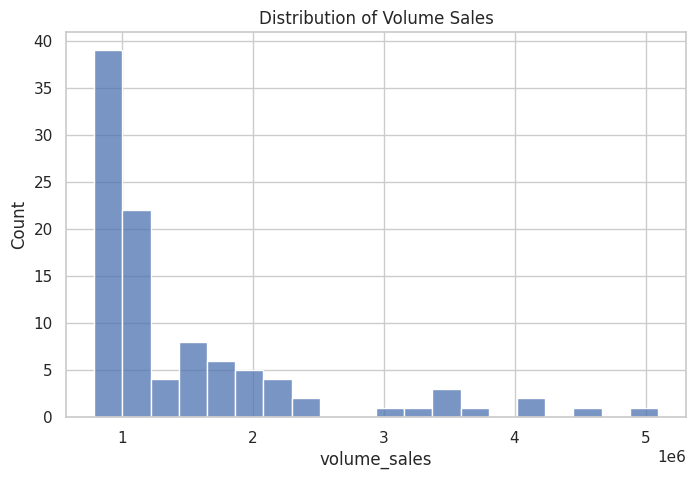

In [16]:
#Sales Distribution (Bestseller Concentration)
plt.figure(figsize=(8,5))
sns.histplot(df["volume_sales"], bins=20)
plt.title("Distribution of Volume Sales")
plt.show()


In [17]:
total_sales = df["volume_sales"].sum()
top10_sales = df.sort_values(by="volume_sales", ascending=False).head(10)["volume_sales"].sum()

top10_share = top10_sales / total_sales * 100
top10_share


np.float64(25.5787887944127)